## Project Goals
For this project, we're taking on a roll at an e-learning company that offers courses on programming. Most of our courses are on web and mobile development but we also cover many other domains like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal of this project is to find out the two best markets to advertise our product in.

We are going to combine some of our statstical skills to perform practical data analysis. Including:
- summarize distributions using the mean, the median, and the mode.
- measure the variability of a distribution using the range, the mean absolute deviation, the variance, and the standard deviation.
- locate any value in a distribution using z-scores.

## Data
Rather than creating our own dataset, we can try to search existing data that might be relevant for our project  goal. One good candidate is the data from freeCodeCamp's 2017 New Coder [Survey](http://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](http://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication with over 400,000 followers, their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this GitHub [repository](http://github.com/freeCodeCamp/2017-new-coder-survey).

Below we will do a quick data exploration of the survey.

In [1]:
import pandas as pd
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = False)
print(survey.shape)
pd.options.display.max_columns = 150 # to avoid truncated output 
survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Representivity of Data

As we mentioned earlier, most of the courses this company offers are on web and mobile development but we also cover many other domains like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and wether it has has the appropriate categories of people for our purpose.

The 'JobRoleInterest' column describes the role(s) each survey participant would be interested in working. We will infer that if a participant is interested in working in a certain domain, it also means that they're interested in learning about that domain. 

Let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.This table will show the percentage of respondant's answers for each value.

In [2]:
survey['JobRoleInterest'].value_counts(normalize = True)*100

Full-Stack Web Developer                                                                                                                                                                                                   11.770595
  Front-End Web Developer                                                                                                                                                                                                   6.435927
  Data Scientist                                                                                                                                                                                                            2.173913
Back-End Web Developer                                                                                                                                                                                                      2.030892
  Mobile Developer                                                                  

The information in this table above is quite granular, but from a quick scan it looks like:

- Quite a few people are interested in web development (full-stack web development, front-end web development, and back-end web development).
- A few people are interested in mobile development.
- A few people are interested in domains other than web and mobile development.

Of note, many respondents are interested in more than one subject. It may be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests.

Let's find the percentage of respondants for multiple subjects listed in the `JobRoleInterest` column along with the amounts of roles chosen. 

We will:
- Split each string in the JobRoleInterest column to find the number of options for each participant.
    - We'll first drop the null values because we can't split Nan values.
- Generate a frequency table for the variable describing the number of options.
    - This table will show the percentage of responses with a the given number of interests

In [3]:
# drop null values and then split each string in the 'JobRoleInterest' column
interests_drop_nulls = survey['JobRoleInterest'].dropna()
split_interests = interests_drop_nulls.str.split(',')

# Frequency table for the variable describing the number of options
num_options = split_interests.apply(lambda x: len(x)) # x is the list of job options
num_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

It appears that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in. The overwhelming majority of students have mixed interests. Given that our company offer courses on various subjects, the fact that new coders have mixed interest may good for us.

The focus of our courses is on web and mobile development. Let's find the percentage of respondents who chose at least one of these two options and compare it with all other options.

In [4]:
# Selecting where web or mobile developer was an interest
web_or_mobile = interests_drop_nulls.str.contains(
    'Web Developer' or 'Mobile Developer') # returns an array of boolean values
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)


True     82.608696
False    17.391304
Name: JobRoleInterest, dtype: float64


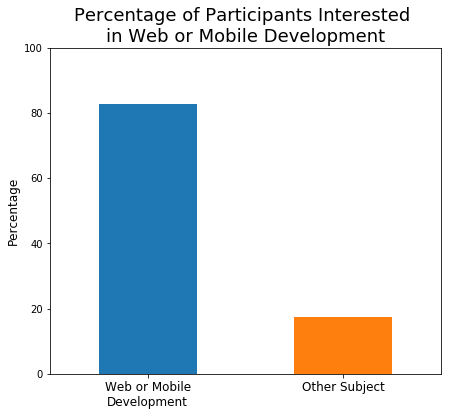

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

freq_table.plot.bar(figsize = (7, 6))
plt.title('Percentage of Participants Interested \nin Web or Mobile Development', fontsize = 18)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or Mobile\nDevelopment', 'Other Subject'],
           rotation = 0, fontsize = 12) # the initial xtick labels were True and False as the in the freq_table
plt.ylim([0,100])
plt.show()

Most people in this survey (around 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample as representing our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

In order to figure out what the best markets are to invest money in for advertising our courses. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number(density) of new coders.
- How much money new coders are willing to spend on learning.

## Locations and Densities of New Coders
The dataset has information about the location of each participant on a country level. The `CountryCitizen` variable describes the country of origin for each participant and the `CountryLive` variable describes what country each participant currently lives in (which may be different than the origin country).

For our analysis, we'll work with the `CountryLive` variable because we're interested where people actually live at the moment when we run the ads.

Because the dataset provides information at a country level, we can think of each country as an individual market. This means we can frame our project goal as finding the two best countries to advertise in.

To make sure we are working with a representative sample, we will drop all the rows where participants didn't answer what role they are interested in. Where a participant didn't respond, we can't know for sure what their interests are, so it's better if we leave out this category of participants.

In [6]:
#Selection only responses where JobRoleInterest was answered
sample = survey[survey['JobRoleInterest'].notnull()].copy()

#frequency table for `CountryLive` column
abs_freq = sample['CountryLive'].value_counts()

#frequency table for `CountryLive` column as a percentage
perc_freq = sample['CountryLive'].value_counts(normalize = True)*100

#display the frequency tables
pd.DataFrame( data = {'Absolute Frequency by Country': abs_freq, 'Percent Frequency by Country' : perc_freq}) 

,Absolute Frequency by Country,Percent Frequency by Country
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550



### Market Indicators and Densities
One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In our results above we can see that45.7% of our potential customers are located in the United States which could be a promising market.
India has the second greatest customer density of 7.7% which is not far from the United Kingdom at 4.6%  or Canada at 3.8%.

Next we will go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for this company.

## Money for Learning
The `MoneyForLearning` column indicates the amount of money spent by participants from the moment they started coding until the moment they completed the survey in US dollars. Our company sells subscriptions at a price of $59 per month, so we're interested in finding out how much money each student spends per month.

We will also narrow down our analysis to only four countries: the United States, India, the United Kingdom, and Canada. We will choose these four because:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

We'll begin by creating a new column that indicates the amount of money a student has spent per month so far. To do this, we'll divide the MoneyForLearning column by the `MonthsProgramming column` (to calculate dollars per month). Some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0 we'll replace 0 with 1 in the `MonthsProgramming` column.

In [7]:
# replacing 0 with 1 in the `MonthsProgramming` column
sample['MonthsProgramming'].replace(0,1, inplace = True)

# creating new column to calculate dollars per month
sample['DollarsPerMonth'] = sample['MoneyForLearning'] / sample['MonthsProgramming']

#check for null values
sum(sample['DollarsPerMonth'].isnull())

675

There are 675 null values in the `DollarsPerMonth` column. We will remove these from our dataset.

In [8]:
# keeping non-null values for `DollarsPerMonth`
sample = sample[sample['DollarsPerMonth'].notnull()]

We want to group the data by the `CountryLive` column to find out how much money a student spends on average each month in the United States, India, the United Kingdom, and Canada.
We will need to first determine whether there are any null values in the `CountryLive` column and remove them if there are.

In [9]:
# Checking for the number of null values 
sample['CountryLive'].isnull().sum()

105

In [10]:
# keeping non-null values for `CountryLive` 
sample = sample[sample['CountryLive'].notnull()]

# data check for amounts of data
sample['CountryLive'].value_counts().head(4)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

Our data loss was about 7% of the United States data, 13% of the India data, 12% of the United Kingdom data, and 8% of the Canada data. Overall we've retained 92.5% of the data which is sufficient. 

Now we can calculate the average dollars spent per month in each country by a student. We'll compute the average using the mean.

In [11]:
country_mean = sample.groupby('CountryLive').mean()

country_mean['DollarsPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]


CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: DollarsPerMonth, dtype: float64

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies)), we may expect students in the UK and Canada to spend more on learning than people in India.

It may be that we don't have have enough representative data for the United Kingdom, Canada, and India, or that we have some outliers making the mean too big for India, or too low for the UK and Canada. Or it may be that the results are sound.

## Handling Outliers
We can visualize outliers by using boxplots:

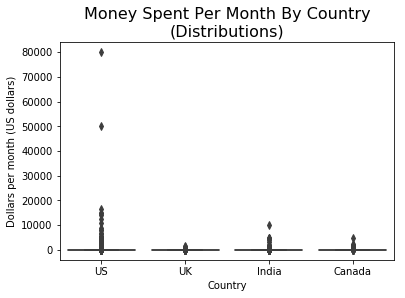

In [12]:
# isolate our 4 countries of interest
countries_4 = sample[sample['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
# generating boxplot
import seaborn as sns
sns.boxplot( x = 'CountryLive', y= 'DollarsPerMonth', data = countries_4 )
plt.title('Money Spent Per Month By Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Dollars per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlapping
plt.show()

Immediately we can see that there are 2 extreme outliers for the US at 50000 and 80000 US dollars per month. While these datapoints may be accurate, they are rare in our dataset and they are skewing our data. We will remove any value above 20000 USD per month and re-evaluate the data.  

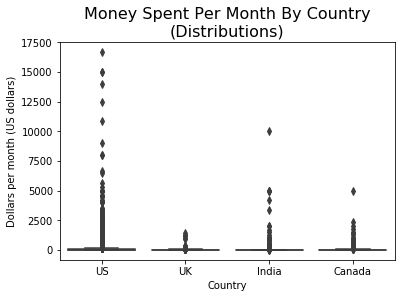

In [13]:
# remove DollarsPerMonth values over 20000
countries_4 = countries_4[countries_4['DollarsPerMonth']<20000]
# isolate our 4 countries of interest
#countries_4 = sample[sample['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

# re-plot our data
sns.boxplot( x = 'CountryLive', y= 'DollarsPerMonth', data = countries_4 )
plt.title('Money Spent Per Month By Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Dollars per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlapping
plt.show()

Let's see how removing the US extreme outliers affected our mean values:

In [14]:
country_mean = countries_4.groupby('CountryLive').mean()

country_mean['DollarsPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: DollarsPerMonth, dtype: float64

The removal of the two extreme outliers brought the mean dollars per month down to 183 dollars from 227 dollars for the United States.

THere still seems to be quite a few participants with very high `DollarsPerMonth` values (spending more than 6000 per month). Let's examine each of these cases and decide how to handle them individually. 

In [15]:
us_outliers = countries_4[
    (countries_4['CountryLive'] == 'United States of America')
    & (countries_4['DollarsPerMonth'] > 6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,DollarsPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

There are 11 outliers spending more than 6000 USD per month. Out of the 11 it appears that 6 of them attended a bootcamp. These can be expensive so the datapoints should remain in the sample. For the remaining 5 participants that did not attend bootcamp, it is hard to tell from the data the reason for the high dollar amount spent on learning

Also, the data shows that eight out of the 11 respondents had been programming for no more than three months when they completed the survey. It is likely that they paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrepresentative and should be probably be significantly lower per month overall. 

After taking all of this into consideration, we'll remove the outliers from the United States who have not enrolled in a bootcamp and those who have been coding for less than 3 months and those who have not attended a bootcamp from.



In [16]:
# Remove those outliers who have not attended a bootcamp
no_bootcamp = countries_4[(countries_4['CountryLive'] == 'United States of America') 
                          & (countries_4['DollarsPerMonth'] > 6000) 
                          & (countries_4['AttendedBootcamp']==0)]
                      
countries_4 = countries_4.drop(no_bootcamp.index)
        
# Remove outliers who have been programming less than 3 months
under_3 = countries_4[(countries_4['CountryLive'] == 'United States of America') 
                          & (countries_4['DollarsPerMonth'] > 6000) 
                          & (countries_4['MonthsProgramming'] <3)]

countries_4 = countries_4.drop(under_3.index)

Let's take another look at our box plot.

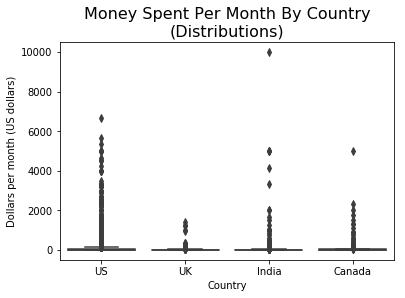

In [17]:
# re-plotting our data
sns.boxplot( x = 'CountryLive', y= 'DollarsPerMonth', data = countries_4 )
plt.title('Money Spent Per Month By Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Dollars per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlapping
plt.show()

The remaining outliers for the US can be explained by the data so there doesn't appear to be any more reason at this time to trim more data from the US.

There doesn't immediately appear to be any outliers for the UK data.

Next, let's examine the outliers in the India data. These outliers are those having spend more than 2500 per month. Let's examine their responses to determine if there is a clear reason for spending large amounts of money on learning

In [18]:
india_outliers = countries_4[(countries_4['CountryLive'] == 'India') & 
    (countries_4['DollarsPerMonth'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,DollarsPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,Na

It appears that none of these participant attended a bootcamp, which can be very expensive. Overall, it's hard to determine from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they may have misunderstood and thought university tuition is included. It seems safe to remove these rows of data.

We will remove these outliers and then re-check our mean values for `DollarsPerMonth`.

In [19]:
countries_4 = countries_4.drop(india_outliers.index) # using the row index values

In [20]:
# recheck the mean values
country_mean = countries_4.groupby('CountryLive').mean()

country_mean['DollarsPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    144.888094
India                        65.758763
United Kingdom               45.534443
Canada                      113.510961
Name: DollarsPerMonth, dtype: float64

This brought the mean dollars per month of India down to 65.76 USD per month from 135 USD per month. 

We hadn't revisited the mean dollars per month for the US data since we trimmed a few more outliers. The mean has dropped to 145 USD from the original 227 USD.

Finally, let's examine the lone outlier for the Canada data where the respondent spent more than 4000 USD per month.

In [21]:
# finding Canada outlier
canada_outlier = countries_4[
    (countries_4['DollarsPerMonth']> 4000) & (countries_4['CountryLive'] == 'Canada')]
canada_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,DollarsPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This individual registered for a bootcamp and attended several coding events but has been coding for less than 2 months. As we did for the United States data, we will drop this respondent from the data

In [22]:
countries_4 = countries_4.drop(canada_outlier.index)

Now that we've removed the outliers, lets recalculate the mean dollars spent per month by country and re-plot our box plot.

In [23]:
country_mean = countries_4.groupby('CountryLive').mean()

country_mean['DollarsPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    144.888094
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: DollarsPerMonth, dtype: float64

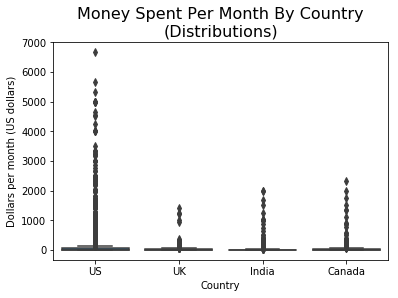

In [24]:
# re-plotting our data
sns.boxplot( x = 'CountryLive', y= 'DollarsPerMonth', data = countries_4 )
plt.title('Money Spent Per Month By Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Dollars per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlapping
plt.show()

## Chosing the 2 Most Favorable Markets
The data shows that advertising in the United States will be favorable. There are many new coders located there and they are willing to pay around 145 USD per month to learn.

Our subscriptions sell at a price of 59 USD per month. At first inspection Canada seems to be the best second choice because people there are willing to pay roughly 93 USD per month, compared to India at 66 USD, and the United Kingdom at 45 USD.

The data suggests that we shouldn't advertise in the UK, but let's take a closer look at India before deciding to choose Canada as our second market.

Let's look at the percentage of respondents by counrty.

In [25]:
countries_4['CountryLive'].value_counts(normalize = True)*100

United States of America    74.974333
India                       11.729979
United Kingdom               7.161191
Canada                       6.134497
Name: CountryLive, dtype: float64

In India, respondents were willing to pay 66 USD per month and our subscription price of 59 USD is below that. Though, in Canada, respondents were willing to pay 93 USD per month.

India has almost twice as many potential customers as there appear to be in Canada (11.7% of the data come from respondents in India while only 6.1% of the respondents were from Canada).

It isn't entirely clear at this point whether India or Canada is the best second market for advertising. As there are compelling arguments for advertising either India or Canada, we should reach out to the marketing team to see if they can set any parameters around what makes a market more favorable.